In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [4]:
full_data = pd.read_csv("titanic_dataset.csv")
print("Train data: ", full_data.shape)
full_data.tail(5)

Train data:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

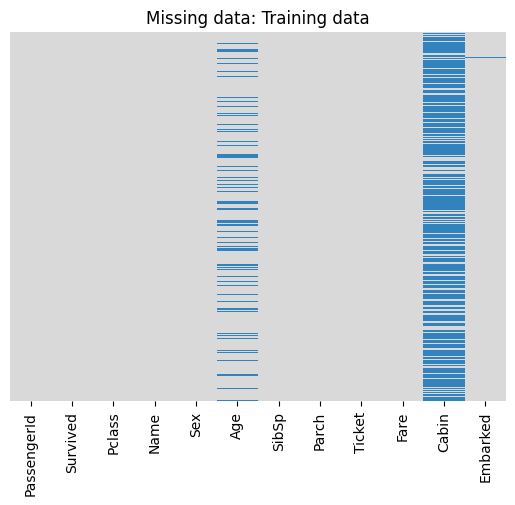

In [ ]:
sns.heatmap(full_data.isnull(), yticklabels = False, cbar = False, cmap = "tab20c_r")
plt.title ("Missing data: Training data")
plt.show

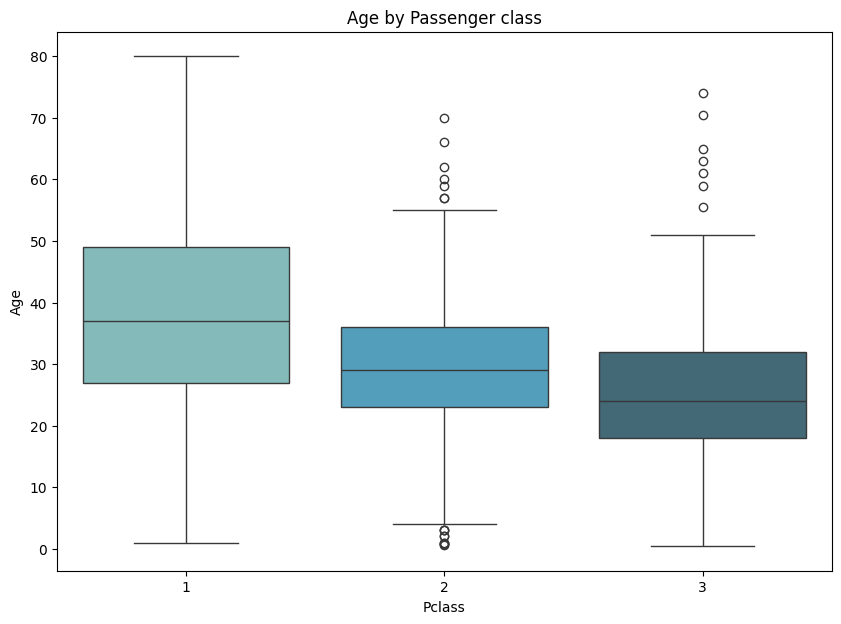

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "Pclass", y = "Age", data = full_data, palette = "GnBu_d")
plt.title("Age by Passenger class")
plt.show()

In [ ]:
def impute_age (cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass ==1:
      return 37

    elif Pclass == 2:
        return 29

    else:
        return 24
  else:
    return Age

full_data["Age"] = full_data[["Age", "Pclass"]].apply(impute_age, axis = 1)

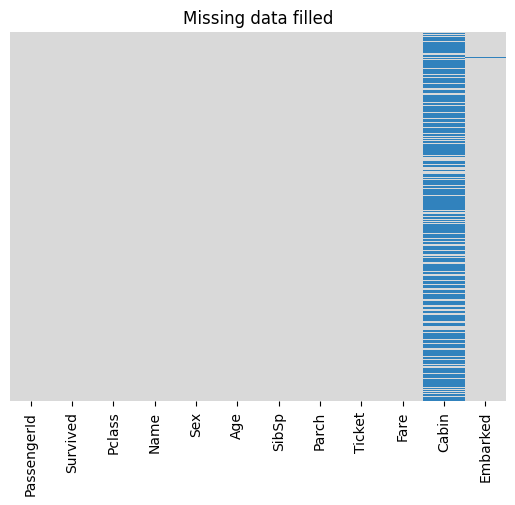

In [ ]:
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False, cmap = "tab20c_r" )
plt.title("Missing data filled")
plt.show()

In [ ]:
full_data.drop("Cabin", inplace = True, axis = 1)

In [ ]:
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
full_data.dropna(inplace = True)

In [ ]:
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
full_data.drop(["Name", "Ticket"], axis = 1, inplace = True)

objcat = ["Sex", "Embarked"]
for colname in objcat:
  full_data[colname] = full_data[colname].astype("category")

In [ ]:
full_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
full_data.drop("PassengerId", axis = 1, inplace = True)

In [ ]:
full_data.select_dtypes(["category"]).columns

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
sex = pd.get_dummies(full_data["Sex"], drop_first = True)
embarked = pd.get_dummies(full_data["Embarked"], drop_first = True)

In [ ]:
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
full_data = pd.concat([full_data, sex, embarked], axis = 1)
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [ ]:
full_data["male"] = full_data["male"].astype(int)
full_data["Q"] = full_data["Q"].astype(int)
full_data["S"] = full_data["S"].astype(int)
full_data.head(5)



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [ ]:
full_data.drop(["Sex", "Embarked"], axis = 1, inplace = True)
full_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
x = full_data.drop("Survived", axis = 1)# grabs everything except "Survived"

y = full_data["Survived"] # y is the column we are trying to predict

In [ ]:
x # x represents the features
x.shape

(889, 8)

In [ ]:
#y represents the target variale/outcome/result
y.shape

(889,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state= 101)

In [ ]:
x_train.shape
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
127,3,24.0,0,0,7.1417,1,0,1
133,2,29.0,1,0,26.0000,0,0,1
619,2,26.0,0,0,10.5000,1,0,1
439,2,31.0,0,0,10.5000,1,0,1
374,3,3.0,3,1,21.0750,0,0,1
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,0,0,1
840,3,20.0,0,0,7.9250,1,0,1
338,3,45.0,0,0,8.0500,1,0,1
524,3,24.0,0,0,7.2292,1,0,0


In [ ]:
y_train.shape
y_train

,Survived
127,1
133,1
619,0
439,0
374,0
...,...
576,1
840,0
338,1
524,0


In [ ]:
x_test.shape
x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,8.0500,1,0,1
613,3,24.0,0,0,7.7500,1,1,0
615,2,24.0,1,2,65.0000,0,0,1
337,1,41.0,0,0,134.5000,0,0,0
718,3,24.0,0,0,15.5000,1,1,0
...,...,...,...,...,...,...,...,...
731,3,11.0,0,0,18.7875,1,0,0
630,1,80.0,0,0,30.0000,1,0,1
184,3,4.0,0,2,22.0250,0,0,1
422,3,29.0,0,0,7.8750,1,0,1


In [ ]:
y_test.shape
y_test

,Survived
511,0
613,0
615,1
337,1
718,0
...,...
731,0
630,1
184,1
422,0


**Model** **Training**



In [ ]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()

lreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Testing**

In [ ]:
y_pred_lreg = lreg.predict(x_test)
print(y_pred_lreg)
print(y_pred_lreg.shape)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0]
(223,)


In [ ]:
probabilities = lreg.predict_proba(x_test)[:,1]
print(probabilities.shape)
print(probabilities)

(223,)
[0.12479802 0.11957465 0.77448428 0.92472997 0.12314585 0.04534401
 0.14951747 0.24258705 0.08853576 0.57182633 0.81813345 0.93693935
 0.12472525 0.51888937 0.12548407 0.14075797 0.94565121 0.80560307
 0.58376019 0.11373739 0.12508743 0.09226559 0.44380669 0.36214362
 0.0287336  0.43699582 0.55488082 0.46333937 0.07938136 0.31746104
 0.09226772 0.24364641 0.00596301 0.1208521  0.12453666 0.07902226
 0.77556521 0.07058966 0.05450454 0.13746271 0.56686715 0.15845678
 0.13654944 0.93265547 0.67456403 0.12939446 0.57654217 0.88591183
 0.13262036 0.28309623 0.49675495 0.8354952  0.1663133  0.14180217
 0.12432676 0.08039377 0.4341796  0.09735641 0.05950379 0.90969715
 0.57182633 0.94753647 0.89839742 0.09087553 0.14245831 0.0544168
 0.13222612 0.43575534 0.06384753 0.0868281  0.35608994 0.1105588
 0.68154533 0.90629523 0.07094284 0.6559537  0.09083651 0.1105588
 0.10447571 0.30768624 0.34076891 0.3878948  0.38449188 0.14075797
 0.29773617 0.68889758 0.07009246 0.87729809 0.07827254 0.

In [ ]:
for i in range(len(y_test)):
  print(round(probabilities[i],3),"---->",y_pred_lreg[i])

0.125 ----> 0
0.12 ----> 0
0.774 ----> 1
0.925 ----> 1
0.123 ----> 0
0.045 ----> 0
0.15 ----> 0
0.243 ----> 0
0.089 ----> 0
0.572 ----> 1
0.818 ----> 1
0.937 ----> 1
0.125 ----> 0
0.519 ----> 1
0.125 ----> 0
0.141 ----> 0
0.946 ----> 1
0.806 ----> 1
0.584 ----> 1
0.114 ----> 0
0.125 ----> 0
0.092 ----> 0
0.444 ----> 0
0.362 ----> 0
0.029 ----> 0
0.437 ----> 0
0.555 ----> 1
0.463 ----> 0
0.079 ----> 0
0.317 ----> 0
0.092 ----> 0
0.244 ----> 0
0.006 ----> 0
0.121 ----> 0
0.125 ----> 0
0.079 ----> 0
0.776 ----> 1
0.071 ----> 0
0.055 ----> 0
0.137 ----> 0
0.567 ----> 1
0.158 ----> 0
0.137 ----> 0
0.933 ----> 1
0.675 ----> 1
0.129 ----> 0
0.577 ----> 1
0.886 ----> 1
0.133 ----> 0
0.283 ----> 0
0.497 ----> 0
0.835 ----> 1
0.166 ----> 0
0.142 ----> 0
0.124 ----> 0
0.08 ----> 0
0.434 ----> 0
0.097 ----> 0
0.06 ----> 0
0.91 ----> 1
0.572 ----> 1
0.948 ----> 1
0.898 ----> 1
0.091 ----> 0
0.142 ----> 0
0.054 ----> 0
0.132 ----> 0
0.436 ----> 0
0.064 ----> 0
0.087 ----> 0
0.356 ----> 0
0.111 ---->

In [ ]:
#Score Check
from sklearn.metrics import classification_report, accuracy_score

print("Classification Model")
#Accuracy
print("--"*30)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg)*100,2)
print("Accuracy", logreg_accuracy,"%")

Classification Model
------------------------------------------------------------
Accuracy 82.96 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree =  DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_dtree = dtree.predict(x_test)

print("Decision Tree Classifier")
print("--"*13)

dtree_acc  = round(accuracy_score(y_test, y_pred_dtree)*100, 2)
print(f"Accuracy Score is: {dtree_acc}%")

Decision Tree Classifier
--------------------------
Accuracy Score is: 73.99%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_rfc = rfc.predict(x_test)

print("Random Forest Classifier")
print("--"*13)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100, 3)
print(f"Accuracy Score is: {rfc_accuracy}%")

Random Forest Classifier
--------------------------
Accuracy Score is: 81.166%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_gbc = gbc.predict(x_test)

print("Gradient Boosting Classifier")
print("--"*13)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc)*100, 4)
print(f"Accuracy Score is: {gbc_accuracy}%")

Gradient Boosting Classifier
--------------------------
Accuracy Score is: 84.3049%


In [ ]:
model_scores = {
                "Logistic Regression": logreg_accuracy,
    "Decision Tree Classifier": dtree_acc,
    "Random Forest Classifier": rfc_accuracy,
    "Gradient Boosting Classifier": gbc_accuracy
}
sorted_score = sorted(model_scores.items(), key = lambda x:x[1], reverse = True)
print("Model Rankings (Greater values are better): ")
for rank, (model_name, score) in enumerate(sorted_score, 1):
  print(f"{rank}. {model_name} : {score}")

Model Rankings (Greater values are better): 
1. Gradient Boosting Classifier : 84.3049
2. Logistic Regression : 82.96
3. Random Forest Classifier : 81.166
4. Decision Tree Classifier : 73.99
